In [26]:
# Importıng the libraries that will use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [65]:
# Load the dataset from an Excel file and display basic information
dataSet = pd.read_excel("HousePricePrediction.xlsx")

# Show the first 10 rows of the dataset
print(dataSet.head(10))

# Display summary info including data types and missing values 
print(dataSet.info())

# Print the shape of the dataset (rows, columns)
print(dataSet.shape)

      price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000   7420         3          2        3      yes        no       no   
1  12250000   8960         4          4        4      yes        no       no   
2  12250000   9960         3          2        2      yes        no      yes   
3  12215000   7500         4          2        2      yes        no      yes   
4  11410000   7420         4          1        2      yes       yes      yes   
5  10850000   7500         3          3        1      yes        no      yes   
6  10150000   8580         4          3        4      yes        no       no   
7  10150000  16200         5          3        2      yes        no       no   
8   9870000   8100         4          1        2      yes       yes      yes   
9   9800000   5750         3          2        4      yes       yes       no   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      

In [66]:
# Generate and transpose summary statistics for numerical columns in the dataset.
dataSet.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.963303e+00,7.367282e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [67]:
# Check for missing values in each column and count how many are present.
dataSet.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

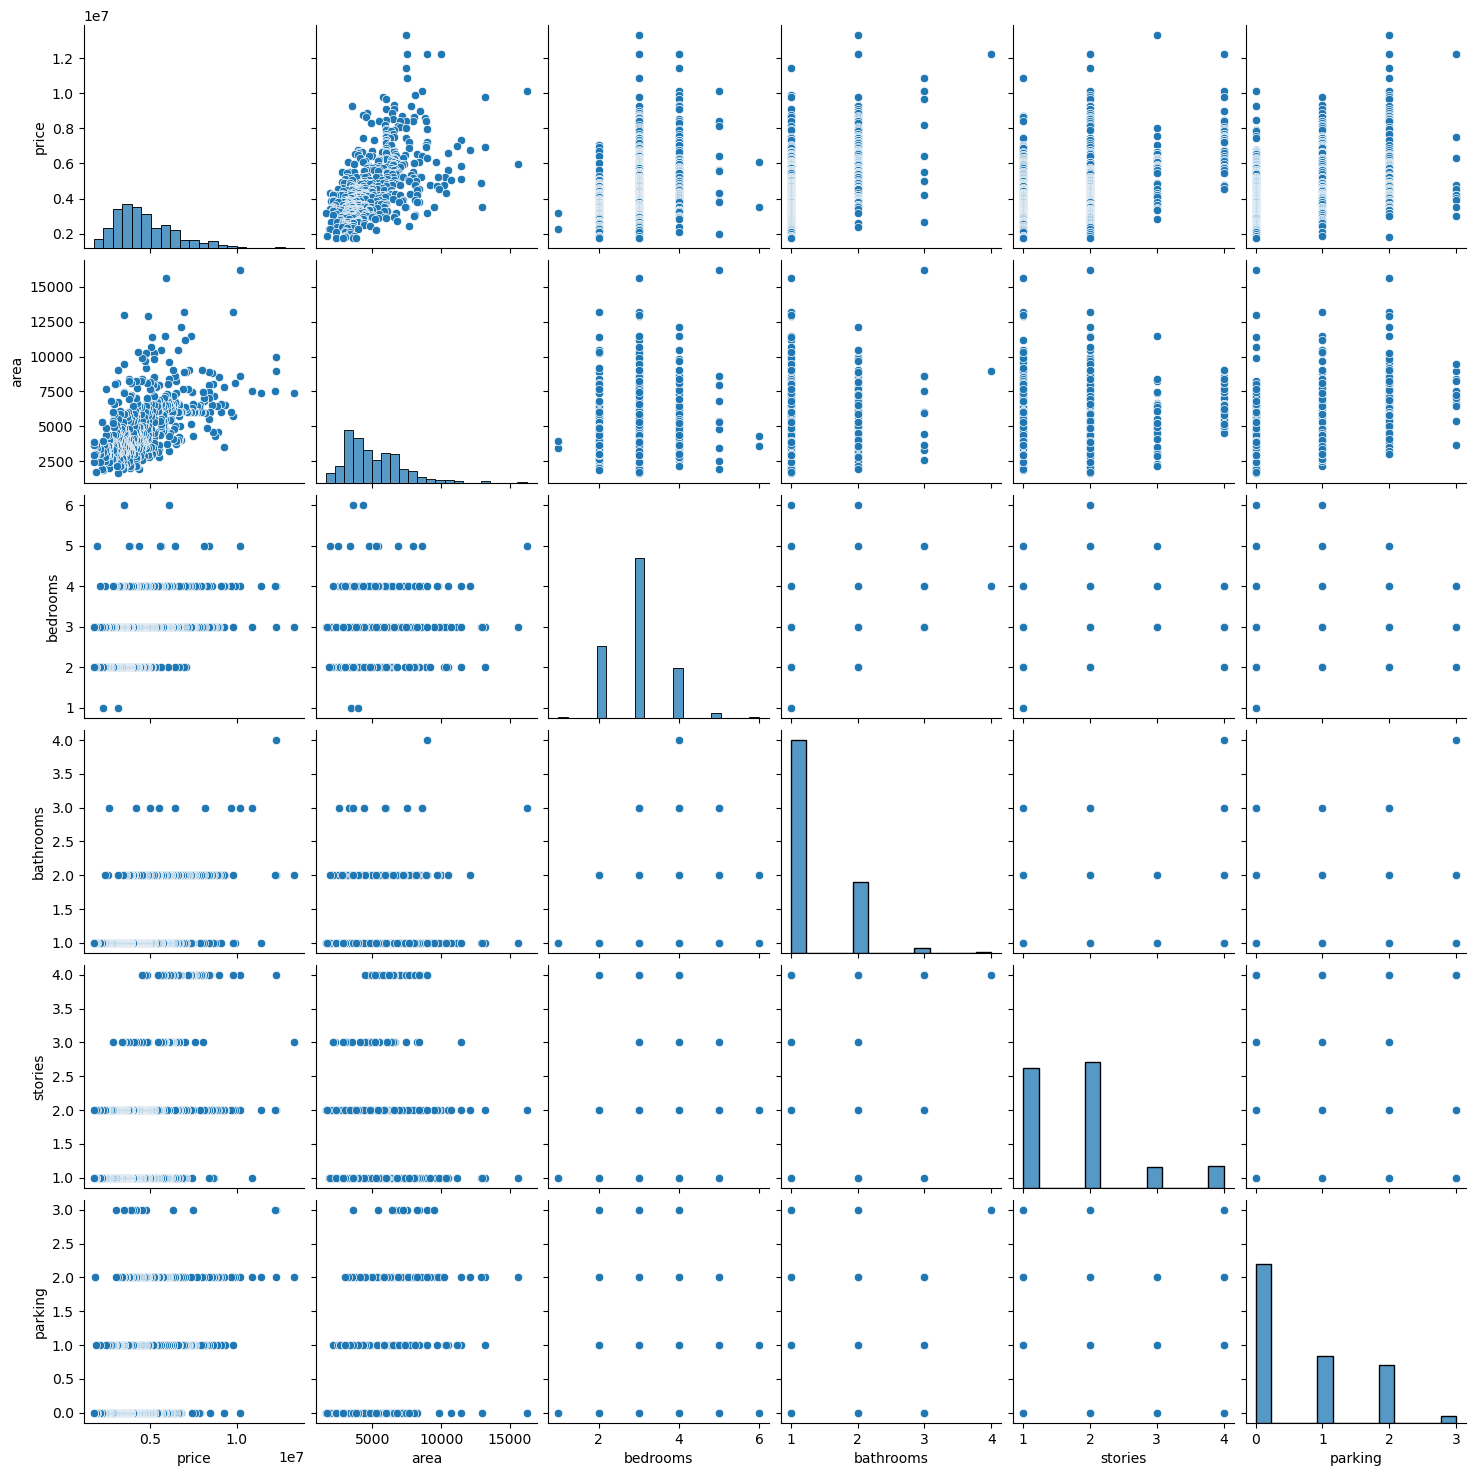

In [68]:
# Create pairwise scatter plots for all numerical features to visualise relationships 
sns.pairplot(dataSet)
plt.show()

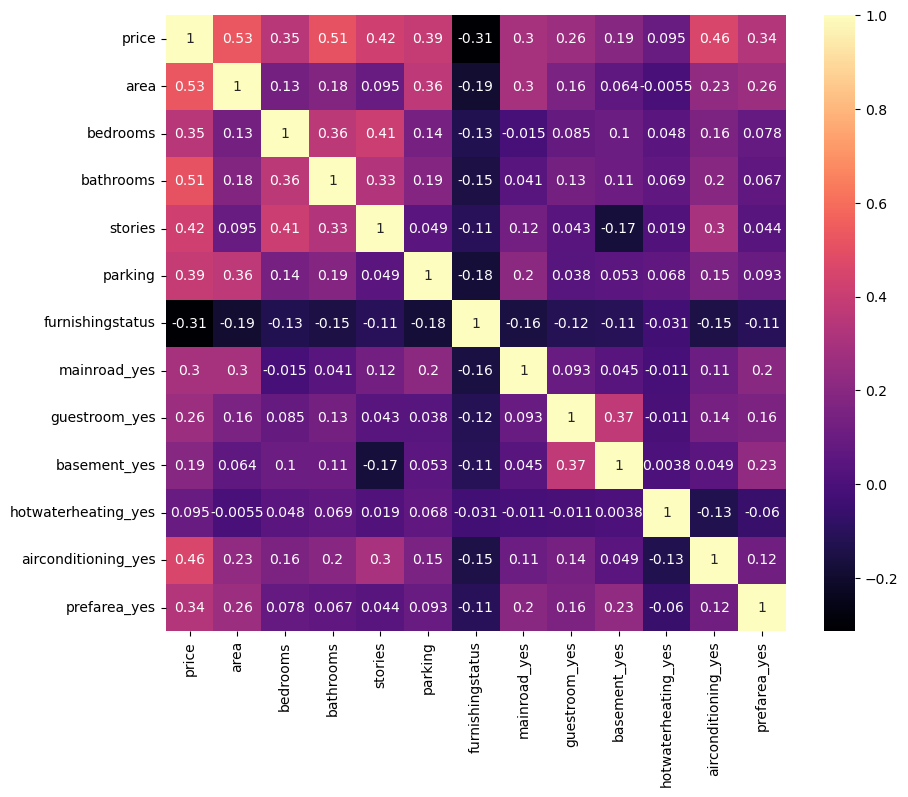

In [60]:
# Plot a heatmap to visualize the correlation matrix between numerical features
plt.figure(figsize=(10,8))
sns.heatmap(dataSet.corr(),annot = True, cmap = "magma")
plt.show()

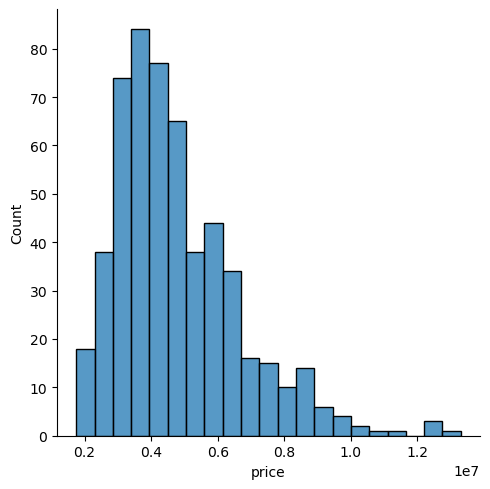

In [36]:
# Create a distribution plot (histogram) for the price column to visualize its frequency distribution
sns.displot(dataSet["price"])

In [37]:
# Identify and list all categorical column in the dataset
categoricalDatas = dataSet.select_dtypes(include = ["object"]).columns;categoricalDatas

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [38]:
# Loop through each categorical column and print its unique values
for column in categoricalDatas:
    unique_datas = dataSet[column].unique()
    print(f"Unique Values for {column} : {unique_datas}")

Unique Values for mainroad : ['yes' 'no']
Unique Values for guestroom : ['no' 'yes']
Unique Values for basement : ['no' 'yes']
Unique Values for hotwaterheating : ['no' 'yes']
Unique Values for airconditioning : ['yes' 'no']
Unique Values for prefarea : ['yes' 'no']
Unique Values for furnishingstatus : ['furnished' 'semi-furnished' 'unfurnished']


Bu kod parçasında ise kategorik değişkenlerimizin benzersiz değerlerini gözlemliyoruz.

In [40]:
# Apply one-hot encoding to selected binary categorical columns and integrate the results into the dataset.

from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder, dorpping the first category to avoid multicollineratiy
encoder = OneHotEncoder(drop = "first", sparse_output = False)

# Fit and transform the selected binary categorical columns
binary_enco = encoder.fit_transform(dataSet[["mainroad", "guestroom",
                                         "basement", "hotwaterheating",
                                         "airconditioning", "prefarea"]])

# Convert the encoded array into a DataFrame with appropriate column names
binary_enco_df = pd.DataFrame(binary_enco, columns = 
                             encoder.get_feature_names_out(["mainroad", "guestroom",
                                         "basement", "hotwaterheating",
                                         "airconditioning", "prefarea"]))

# Remove the original binary categorical columns from the dataset
dataSet.drop(["mainroad", "guestroom",
        "basement", "hotwaterheating",
        "airconditioning", "prefarea"], axis = 1, inplace = True)

# Concatenate the encoded DataFrame with the original dataset.
dataSet = pd.concat([dataSet, binary_enco_df], axis  = 1)


In [41]:
# Encode the furnishingstatus categorical column into numeric labels using LabelEncoder

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

# Fit and transform the furnishingstatus column with numerical labels
dataSet["furnishingstatus"] = LE.fit_transform(dataSet["furnishingstatus"])

dataSet

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,3,2,3,2,0,1.0,0.0,0.0,0.0,1.0,1.0
1,12250000,8960,4,4,4,3,0,1.0,0.0,0.0,0.0,1.0,0.0
2,12250000,9960,3,2,2,2,1,1.0,0.0,1.0,0.0,0.0,1.0
3,12215000,7500,4,2,2,3,0,1.0,0.0,1.0,0.0,1.0,1.0
4,11410000,7420,4,1,2,2,0,1.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,2,1.0,0.0,1.0,0.0,0.0,0.0
541,1767150,2400,3,1,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0
542,1750000,3620,2,1,1,0,2,1.0,0.0,0.0,0.0,0.0,0.0
543,1750000,2910,3,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                545 non-null    int64  
 1   area                 545 non-null    int64  
 2   bedrooms             545 non-null    int64  
 3   bathrooms            545 non-null    int64  
 4   stories              545 non-null    int64  
 5   parking              545 non-null    int64  
 6   furnishingstatus     545 non-null    int64  
 7   mainroad_yes         545 non-null    float64
 8   guestroom_yes        545 non-null    float64
 9   basement_yes         545 non-null    float64
 10  hotwaterheating_yes  545 non-null    float64
 11  airconditioning_yes  545 non-null    float64
 12  prefarea_yes         545 non-null    float64
dtypes: float64(6), int64(7)
memory usage: 55.5 KB


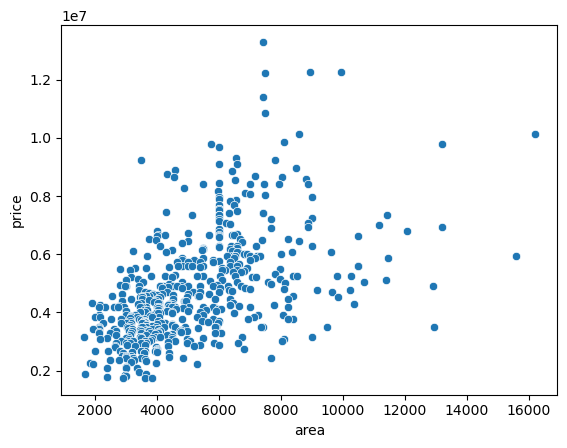

In [43]:
# Create a scatter plot to visualize the relationship between area and price
sns.scatterplot(x = "area", y = "price", data = dataSet)
plt.show()

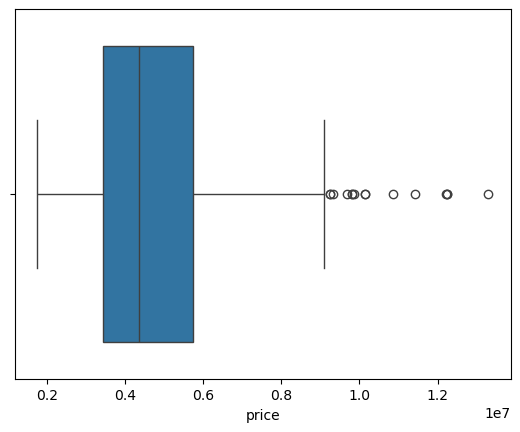

In [44]:
# Create a box plot to visualize the distribution and detect outliers in the 'price' column
sns.boxplot(x = dataSet["price"])
plt.show()

In [45]:
# Calculate the Interquartile Range to detect outliers in the price column
Q1 = dataSet['price'].quantile(0.25)
Q3 = dataSet['price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify rows where price is an outlier
outliers = (dataSet['price'] < lower_bound) | (dataSet['price'] > upper_bound)

# Extract the outlier rows
outlier_data = dataSet[outliers]
outlier_data

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,3,2,3,2,0,1.0,0.0,0.0,0.0,1.0,1.0
1,12250000,8960,4,4,4,3,0,1.0,0.0,0.0,0.0,1.0,0.0
2,12250000,9960,3,2,2,2,1,1.0,0.0,1.0,0.0,0.0,1.0
3,12215000,7500,4,2,2,3,0,1.0,0.0,1.0,0.0,1.0,1.0
4,11410000,7420,4,1,2,2,0,1.0,1.0,1.0,0.0,1.0,0.0
5,10850000,7500,3,3,1,2,1,1.0,0.0,1.0,0.0,1.0,1.0
6,10150000,8580,4,3,4,2,1,1.0,0.0,0.0,0.0,1.0,1.0
7,10150000,16200,5,3,2,0,2,1.0,0.0,0.0,0.0,0.0,0.0
8,9870000,8100,4,1,2,2,0,1.0,1.0,1.0,0.0,1.0,1.0
9,9800000,5750,3,2,4,1,2,1.0,1.0,0.0,0.0,1.0,1.0


In [46]:
# Calculate the firs and third quartiles for area
Q1_area = dataSet['area'].quantile(0.25)
Q3_area = dataSet['area'].quantile(0.75)
IQR_area = Q3_area - Q1_area

# Define upper and lower bounds using 3 times the IQR detect extreme outliers.
upper_bound_area = Q3_area + 3 * IQR_area
lower_bound_area = Q1_area - 3 * IQR_area

# Display the bounds
upper_bound_area, lower_bound_area

# Filter the dataset to keep only rows wher area is within the bounds.
dataSet = dataSet[(dataSet['area'] <= upper_bound_area) & (dataSet['area'] >=  lower_bound_area)]

In [47]:
# Seperate the features and target variable from the dataset.
X = dataSet.drop(["price"], axis = 1)
y = dataSet["price"]

In [48]:
# Standardize the feature set to have zero mean and unit variance
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

In [50]:
# Split the dataset into training and testing sets for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y,
                                                   test_size = 0.2,
                                                   random_state = 2)


In [51]:
X_train.shape

(434, 12)

In [52]:
X_test.shape

(109, 12)

In [53]:
# Train and evaluate multiple regression models on the dataset

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define a list of regression models to evaluate
models = [("LinearRegression", LinearRegression()), ("Ridge",Ridge()), 
          ("Lasso", Lasso())]

# Loop through each model, train it, predict on test set and print evaluation metrics
for name,model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    MSE = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Model Name: {name}')
    print(f'Mean Squared Error (MSE): {MSE}')
    print(f'R-squared (R2): {r2}\n')


Model Name: LinearRegression
Mean Squared Error (MSE): 759674857920.1001
R-squared (R2): 0.7955118412819272

Model Name: Ridge
Mean Squared Error (MSE): 760217574816.478
R-squared (R2): 0.7953657535475649

Model Name: Lasso
Mean Squared Error (MSE): 759675692962.9679
R-squared (R2): 0.7955116165063186



In [54]:
LinearRegression = LinearRegression()

In [55]:
LinearRegression_model = LinearRegression.fit(X_train, y_train)

Bu kod parçasında, verilerimizi Lineer Regresyon modeliyle oluşturuyoruz ve modelimizi eğitiyoruz.

In [56]:
y_pred = LinearRegression_model.predict(X_test)
y_pred

array([ 3318821.46595954,  7009292.64096794,  2701449.36748229,
        3185680.99776847,  5875372.91754248,  3918265.32850968,
        5148138.53407509,  3156766.7666311 ,  3339884.64895162,
        3245558.7758765 ,  2913350.38629855,  2798048.41854611,
        3741646.63899265,  6112646.81727707,  6777596.82472555,
        5810109.90601216,  6382317.96689316,  3203689.07370815,
        2880024.20253766,  3588525.44124899,  5509368.67520221,
        3367787.96344818,  6154929.95218982,  4971539.41468197,
        3351948.09332175,  3003826.41484281,  2758721.13465589,
        4234939.90994388,  3801730.69586457,  3276226.39911372,
        4266454.66261286,  4081418.92863202,  4455354.18950387,
        5247732.48882894,  6459734.15751653,  7001359.66751768,
        3317745.35197879,  4896160.72449245,  3495127.26515624,
        3401235.79266359,  5294016.82687261,  3413940.24533753,
        5089495.51028991,  2942416.47658905,  2993851.17233034,
        3853123.66254672,  3581509.61051

In [57]:
# Calculate and print regression evaluation metrics for predictions

MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {MSE}')
print(f'R-squared (R2): {r2}\n')

Mean Squared Error (MSE): 759674857920.1001
R-squared (R2): 0.7955118412819272



In [61]:
# Function to collect user input for house features,predict price using trained model, and display formatted result

import pandas as pd
from tabulate import tabulate
from IPython.display import clear_output

def get_user_inputs():
    print("Please provide the following information: \n")
    print("Print if your answer yes then 1 else 0 \n")
    print("Print if Furnishing status options: furnished=0, semi-furnished=1, unfurnished=2 \n")
    area = float(input("Area in square feet: "))
    bedrooms = int(input("Number of bedrooms: "))
    bathrooms = int(input("Number of bathrooms: "))
    stories = int(input("Number of stories: "))
    mainroad = int(input("Main road access (yes=1/no=0): "))
    guestroom = int(input("Guest room available (yes=1/no=0): "))
    basement = int(input("Basement available (yes=1/no=0): "))
    hotwaterheating = int(input("Hot water heating (yes=1/no=0): "))
    airconditioning = int(input("Air conditioning (yes=1/no=0): "))
    parking = int(input("Number of parking spaces: "))
    prefarea = int(input("Preferred area yes=1/no=0): "))
    furnishingstatus =int(input("Furnishing status: "))

    clear_output(wait=True) # Clear previous input prompts

    user_inputs = {
        "area": area,
        "bedrooms": bedrooms,
        "bathrooms": bathrooms,
        "stories": stories,
        "mainroad": mainroad,
        "guestroom": guestroom,
        "basement": basement,
        "hotwaterheating": hotwaterheating,
        "airconditioning": airconditioning,
        "parking": parking,
        "prefarea": prefarea,
        "furnishingstatus": furnishingstatus
    }
    
    return user_inputs

# Get user input, create DataFrame and predict price with the trained model
user_inputs = get_user_inputs()
user_df = pd.DataFrame([user_inputs])
predicted_price = model.predict(user_df)

# Format and print the predicted price in a table
result_df = pd.DataFrame({"Predicted House Price": predicted_price})
result_df["Predicted House Price"] = result_df["Predicted House Price"].apply(lambda x: f"${x:,.2f}")
table = tabulate(result_df, headers="keys", tablefmt="fancy_grid")

print(table)

╒════╤═════════════════════════╕
│    │ Predicted House Price   │
╞════╪═════════════════════════╡
│  0 │ $3,771,450,061.03       │
╘════╧═════════════════════════╛


C:\Users\Nevzatcem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


Bu kod parçasında da kullanıcıdan ev ile alakalı bilgiler alarak, bu bilgiler ile birlikte "Ev Fiyat Tahminlemesi" yaptırıyoruz. 